# Cenário

O projeto refere-se ao lançamento de um produto, que envolveu a execução de tráfego em diversos canais para atrair potenciais clientes. Foram fornecidos dados para análise descritiva, identificação de insights de negócios e sugestões de otimizações para aprimorar os resultados em futuros lançamentos. O estudo a seguir, desenvolvido para minha equipe de BI fictícia, oferece uma visão clara do lançamento para os stakeholders. Utilizei meus conhecimentos em análise de dados, incluindo o uso de Python e o cuidado na apresentação das informações de forma clara. Além disso, executei o processo de ETL, que inclui a extração dos dados fornecidos, limpeza, tratamento de valores ausentes e tipagem.

# 1. Importações

In [337]:
import pandas as pd
import numpy as np
import seaborn           as sns
from IPython.display     import Image
import matplotlib.pyplot as plt
import warnings
from random              import sample

warnings.filterwarnings("ignore")

# 2. Carregando Dados

In [980]:
tabela_utm = pd.read_csv("TabelaPesquisaUTMsn - TabelaPesquisaUTMsn.csv")
tabela_links = pd.read_csv("TabelaAdsLinks.csv")
tabela_vendas = pd.read_csv("TabelaVendas.csv")
tabela_pesquisa = pd.read_csv("TabelaPesquisa.csv")

## 2.1 Observação dos Dados

### tabela de leads

In [981]:
print("Temos", tabela_utm.shape[0], "linhas e", tabela_utm.shape[1], "colunas na tabela de leads.")

Temos 9999 linhas e 6 colunas na tabela de leads.


In [982]:
tabela_utm.sample(5)

,Unnamed: 0.1,Unnamed: 0,email,utmsource,utmterm,utmmedium
1366,1366,1366,nadrilima346@gmail.com,facebookads,AD17,2.00_Compras_advantage
8,8,8,56@gmail.com,facebookads,AD17,2.03_lookalike_1_compras_180D_ADS_Campeoes
913,913,913,ycarvalho10@gmail.com,facebookads,AD31,1.02_VideoView50%_30D_AD22_30_33
457,457,457,apdasilva@23gmail.com,facebookads,AD17,2.03_lookalike_1_compras_180D_ADS_Campeoes
4652,4652,4652,amendes@yahoo.com.br,facebookads,AD35,2.03_lookalike_1_compras_180D_ADS_Campeoes


### Tabela de links

In [983]:
print("Temos", tabela_links.shape[0], "linhas e", tabela_links.shape[1], "colunas na tabela de vendas.")

Temos 53 linhas e 3 colunas na tabela de vendas.


In [984]:
tabela_links.head(5)

,Unnamed: 0,utmterm,instagram_permalink_url
0,0,AD17,https://www.instagram.com/p/C1YOilJAw9s/
1,163260,AD12,https://www.instagram.com/p/C1YOirrg95A/
2,169074,AD16,https://www.instagram.com/p/C1LQw8NgSsP/
3,172202,AD21,https://www.instagram.com/p/C1LN_FYAQJg/
4,177674,AD63,https://www.instagram.com/p/C18R6JEgJ-n/


### Tabela de compradores

In [985]:
print("Temos", tabela_vendas.shape[0], "linhas e", tabela_vendas.shape[1], "colunas na tabela de vendas.")

Temos 71 linhas e 3 colunas na tabela de vendas.


In [986]:
tabela_vendas.head(5)

,Unnamed: 0.1,Unnamed: 0,email
0,0,0,andra_miao@hotmail.com
1,1,1,tu@gmail.com
2,2,2,oriomoderno23@gmail.com
3,3,3,cebarbosa80@gmail.com
4,4,4,alisane@hotmail.com


### Tabela de informações dos leads

In [987]:
print("Temos", tabela_pesquisa.shape[0], "linhas e", tabela_pesquisa.shape[1], "colunas na tabela de pesquisa.")

Temos 1379 linhas e 6 colunas na tabela de pesquisa.


In [988]:
tabela_pesquisa.head(5)

,Unnamed: 0.1,Unnamed: 0,email,idade,renda,tempo_me_conhece
0,0,0,ia.souzamichatowski@gmail.com,36 a 40 anos,Até 1.500 reais,Menos de 1 mês
1,1,1,iamikowski@gmail.com,46 a 50 anos,Mais de 5.000 reais,Menos de 1 mês
2,2,2,alves11@Gmail.com,46 a 50 anos,Até 1.500 reais,Menos de 1 mês
3,3,3,ciell675@gmail.com,51 a 55 anos,Até 1.500 reais,Menos de 1 mês
4,4,4,5240da@gmail.com,31 a 35 anos,Até 1.500 reais,Menos de 1 mês


### 2.1.1 Formatação dos dados

### Tabela de leads

In [989]:
# Remoção de colunas inúteis
tabela_utm.drop(tabela_utm.columns[[0, 1 ]], axis=1,inplace=True )
# Renomear colunas
tabela_utm.columns = ['email', 'utm_source', 'utm_term', 'utm_medium']
# Reajuste dos dados
tabela_utm['utm_source'] = tabela_utm['utm_source'].str.replace(r'[\[\]]', '', regex=True).str.lower()
tabela_utm['utm_term'] = tabela_utm['utm_term'].str.replace(r'[\[\]]', '', regex=True).str.lower()
tabela_utm['domain'] = tabela_utm['email'].str.extract(r'(@.*)')
tabela_utm['user'] = tabela_utm['email'].str.split('@').str[0]
# Reordenação de colunas
tabela_utm = tabela_utm[['email','domain','user','utm_source','utm_term','utm_medium',]]
tabela_utm.head()

,email,domain,user,utm_source,utm_term,utm_medium
0,aassis71@gmail.com,@gmail.com,aassis71,facebookads,ad17,2.03_lookalike_3_compras_180D
1,aelionaijs@gmail.com,@gmail.com,aelionaijs,facebookads,ad12,lookalike_1_compras_180D_AD12a17
2,acorreia2019@gmail.com,@gmail.com,acorreia2019,facebookads,ad12,lookalike_1_compras_180D_AD12a17
3,29700781sp@al.educacao.sp.gov.br,@al.educacao.sp.gov.br,29700781sp,facebookads,ad17,2.03_lookalike_3_compras_180D_ADS_Campeoes_Adv...
4,nthia@gmail.com,@gmail.com,nthia,bio,bio,[BIO]


Alguns dados foram reajustados, retirando parênteses e deixando-os minúsculos para uma melhor organização.A coluna "email" foi dividida em 2 colunas para domínios e usuários.

### Tabela de links

In [990]:
# Remoção de colunas inúteis
tabela_links.drop(tabela_links.columns[0], axis=1,inplace=True )
# Renomear colunas
tabela_links.columns = ['utm_term', 'instagram_permalink_url']
# Reajuste dos dados
tabela_links['utm_term'] = tabela_links['utm_term'].str.lower()
tabela_links['path'] = tabela_links['instagram_permalink_url'].str.replace('https://www.instagram.com/', '')
tabela_links.head()

,utm_term,instagram_permalink_url,path
0,ad17,https://www.instagram.com/p/C1YOilJAw9s/,p/C1YOilJAw9s/
1,ad12,https://www.instagram.com/p/C1YOirrg95A/,p/C1YOirrg95A/
2,ad16,https://www.instagram.com/p/C1LQw8NgSsP/,p/C1LQw8NgSsP/
3,ad21,https://www.instagram.com/p/C1LN_FYAQJg/,p/C1LN_FYAQJg/
4,ad63,https://www.instagram.com/p/C18R6JEgJ-n/,p/C18R6JEgJ-n/


Foram realizados alguns reajustes importantes também, como deixar os dados em minúsculos e a extração do url da coluna "permalink" para uma melhor legibilidade.  

### Tabela de compradores

In [991]:
# Remoção de colunas inúteis
tabela_vendas.drop(tabela_vendas.columns[[0,1]], axis=1,inplace=True )
# Reajuste dos dados
tabela_vendas['domain'] = tabela_vendas['email'].str.extract(r'(@.*)')
tabela_vendas['user'] = tabela_vendas['email'].str.split('@').str[0]

tabela_vendas.head()

,email,domain,user
0,andra_miao@hotmail.com,@hotmail.com,andra_miao
1,tu@gmail.com,@gmail.com,tu
2,oriomoderno23@gmail.com,@gmail.com,oriomoderno23
3,cebarbosa80@gmail.com,@gmail.com,cebarbosa80
4,alisane@hotmail.com,@hotmail.com,alisane


### Tabela de informações dos leads

In [992]:
tabela_pesquisa.drop(tabela_pesquisa.columns[[0,1]], axis=1,inplace=True )
tabela_pesquisa['domain'] = tabela_pesquisa['email'].str.extract(r'(@.*)')
tabela_pesquisa['user'] = tabela_pesquisa['email'].str.split('@').str[0]
tabela_pesquisa = tabela_pesquisa[['email','domain','user','idade','renda','tempo_me_conhece']]
tabela_pesquisa = tabela_pesquisa.drop_duplicates()
tabela_pesquisa.head()

,email,domain,user,idade,renda,tempo_me_conhece
0,ia.souzamichatowski@gmail.com,@gmail.com,ia.souzamichatowski,36 a 40 anos,Até 1.500 reais,Menos de 1 mês
1,iamikowski@gmail.com,@gmail.com,iamikowski,46 a 50 anos,Mais de 5.000 reais,Menos de 1 mês
2,alves11@Gmail.com,@Gmail.com,alves11,46 a 50 anos,Até 1.500 reais,Menos de 1 mês
3,ciell675@gmail.com,@gmail.com,ciell675,51 a 55 anos,Até 1.500 reais,Menos de 1 mês
4,5240da@gmail.com,@gmail.com,5240da,31 a 35 anos,Até 1.500 reais,Menos de 1 mês


Nessa tabela de informações pessoais sobre os leads, foram realizadas ajustes importantes como a separação da coluna "email" em domínios e usuários, além da remoção de linhas repetidas para não influenciar na análise de dados mais a frente.

## 2.2 Checando e tratando os dados vazios

### Tabela de leads

In [863]:
tabela_utm.isna().sum()

email          0
domain        15
user           0
utm_source     3
utm_term       3
utm_medium     3
dtype: int64

Após a análise, identificamos e-mails duplicados, sem domínio ou incompletos. No entanto, nenhum desses dados será removido, pois todos representam leads válidos e individuais, sejam eles gerados a partir de e-mails verdadeiros ou inseridos aleatoriamente por motivos pessoais. Estes registros continuam a ser considerados como leads relevantes.

### Tabela de links

In [865]:
tabela_links.isna().sum()

utm_term                   0
instagram_permalink_url    0
path                       0
dtype: int64

### Tabela de compradores

In [867]:
tabela_vendas.isna().sum()

email     0
domain    1
user      0
dtype: int64

Nessa tabela, não será removido ou preenchido nenhum dado de compradores vazios pelo mesmo motivo que não foi da tabela de tráfego de leads.

### Tabela de informações de leads

In [869]:
tabela_pesquisa.isna().sum()

email               0
domain              1
user                0
idade               0
renda               0
tempo_me_conhece    0
dtype: int64

Nessa tabela, não será removido ou preenchido nenhum dado pessoal vazio de um lead pelo mesmo motivo que não foi da tabela de tráfego de leads.

## 2.3 Alterando os tipos de dados

In [870]:
tabela_utm.dtypes

email         object
domain        object
user          object
utm_source    object
utm_term      object
utm_medium    object
dtype: object

In [871]:
tabela_links.dtypes

utm_term                   object
instagram_permalink_url    object
path                       object
dtype: object

In [872]:
tabela_vendas.dtypes

email     object
domain    object
user      object
dtype: object

In [873]:
tabela_pesquisa.dtypes

email               object
domain              object
user                object
idade               object
renda               object
tempo_me_conhece    object
dtype: object

In [874]:
a = pd.CategoricalDtype(categories=['até 20 anos', '21 a 25 anos', '26 a 30 anos', '31 a 35 anos', 
                                    '36 a 40 anos', '41 a 45 anos', '46 a 50 anos', '51 a 55 anos', 
                                    '56 a 60 anos', 'acima de 60'], ordered=True)

tabela_pesquisa['idade'] = tabela_pesquisa['idade'].astype(a)

b = pd.CategoricalDtype(categories=['Até 1.500 reais', 'De 1.500 a 3.000 reais', 'De 3.000 reais a 5.000 reais',
                                    'Mais de 5.000 reais'], ordered=True)

tabela_pesquisa['renda'] = tabela_pesquisa['renda'].astype(b)

c = pd.CategoricalDtype(categories=['Menos de 1 mês', 'De 2 a 6 meses', 'De 6 meses a 1 ano',
                                    'De 1 a 2 anos','Mais de 2 anos'], ordered=True)

tabela_pesquisa['tempo_me_conhece'] = tabela_pesquisa['tempo_me_conhece'].astype(c)

In [875]:
tabela_pesquisa.dtypes

email                 object
domain                object
user                  object
idade               category
renda               category
tempo_me_conhece    category
dtype: object

# 3. Análise dos Dados

## 3.1 Análise Univariada

### 3.1.1 Tabela de leads

#### Variável `domain`

In [876]:
tabela_utm['domain'].describe()

count           9984
unique           245
top       @gmail.com
freq            7307
Name: domain, dtype: object

In [877]:
# Contagem normalizadas
counts = tabela_utm['domain'].value_counts(normalize=True)
percentages = (counts * 100).round(1).astype(str) + '%'

# DataFrame da coluna domínio com suas porcentagens
result_utm = pd.DataFrame({'Dominio': counts.index, 'Porcentagem': percentages}).reset_index(drop=True)
result_utm

,Dominio,Porcentagem
0,@gmail.com,73.2%
1,@hotmail.com,15.3%
2,@yahoo.com.br,3.2%
3,@outlook.com,1.8%
4,@icloud.com,0.5%
...,...,...
240,@gmail.comlq,0.0%
241,@yahoi.com.br,0.0%
242,@hmail.com,0.0%
243,@gmail.br,0.0%


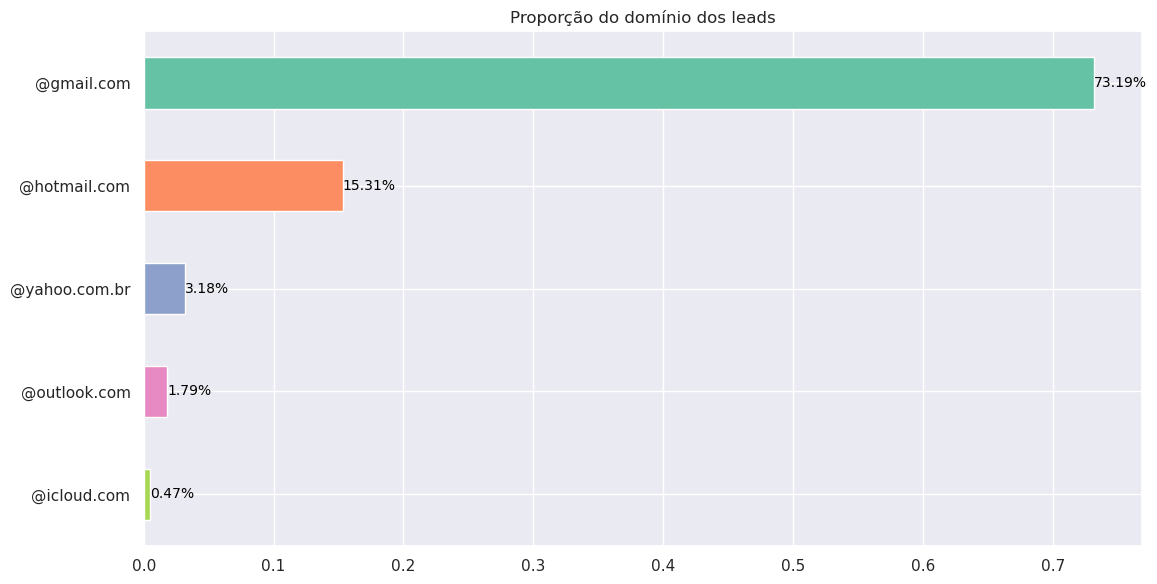

In [878]:
# Plotagem

domain_counts = tabela_utm['domain'].value_counts(normalize=True)

colors = sns.color_palette("Set2")

# Aumenta o tamanho da figura para dar mais espaço
plt.figure(figsize=(12, 6))

domain_counts.head().plot(kind="barh", color=colors)

plt.title("Proporção do domínio dos leads")
plt.legend().set_visible(False)

# Inverte a ordem para exibir o maior valor na parte superior
plt.gca().invert_yaxis()

# Ajusta as margens para dar mais espaço à direita
plt.subplots_adjust(right=0.85)

# Adiciona os valores de proporção do lado direito das barras com ajuste
for index, value in enumerate(domain_counts.head()):
    plt.text(value, index, f'{value:.2%}', va='center', color='black', ha='left', fontsize=10)

# Ajusta o layout para evitar cortes
plt.tight_layout()

# Remove o nome da coluna do eixo y
plt.gca().set_ylabel('')

plt.show()

Dentre os 5 maiores domínios dos leads, observamos que a grande maioria, representando **73,19%**, utiliza o `Gmail` regularmente em seu dia a dia, o que significa que podemos investir em tráfegos pagos via **gmail.com**.

#### variável `utm_source`

In [879]:
tabela_utm['utm_source'].describe()

count            9996
unique             11
top       facebookads
freq             8404
Name: utm_source, dtype: object

In [880]:
# Contagem normalizadas
counts = tabela_utm['utm_source'].value_counts(normalize=True)
percentages = (counts * 100).round(1).astype(str) + '%'

# DataFrame da coluna utm_source com suas porcentagens
result_utm = pd.DataFrame({'utm_source': counts.index, 'Porcentagem': percentages}).reset_index(drop=True)
result_utm

,utm_source,Porcentagem
0,facebookads,84.1%
1,manychat,6.0%
2,bio,3.2%
3,googleads,2.6%
4,stories,2.5%
5,email,1.1%
6,whatsapp,0.3%
7,direct,0.1%
8,shorts,0.1%
9,youtube,0.0%


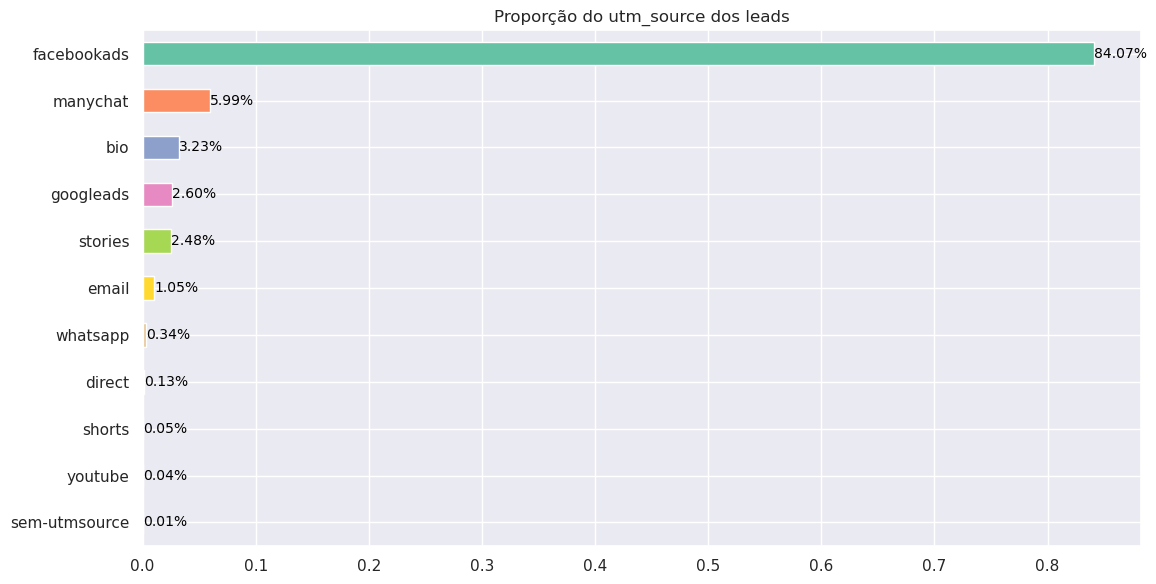

In [881]:
# Plotagem

source_counts = tabela_utm['utm_source'].value_counts(normalize=True)

colors = sns.color_palette("Set2")

# Aumenta o tamanho da figura para dar mais espaço
plt.figure(figsize=(12, 6))

source_counts.plot(kind="barh", color=colors)

plt.title("Proporção do utm_source dos leads")
plt.legend().set_visible(False)

# Inverte a ordem para exibir o maior valor na parte superior
plt.gca().invert_yaxis()

# Ajusta as margens para dar mais espaço à direita
plt.subplots_adjust(right=0.85)

# Adiciona os valores de proporção do lado direito das barras com ajuste
for index, value in enumerate(source_counts):
    plt.text(value, index, f'{value:.2%}', va='center', color='black', ha='left', fontsize=10)

# Ajusta o layout para evitar cortes
plt.tight_layout()

# Remove o nome da coluna do eixo y
plt.gca().set_ylabel('')

plt.show()

O gráfico acima mostra que **84.07%** do tráfego dos leads vieram do `facebookads`, ou seja, a grande maioria usa essa plataforma de anúncios.Também, pode ser investido anúncios no **facebookads**.

#### Variável `utm_term`

In [882]:
tabela_utm['utm_term'].describe()

count     9996
unique      95
top       ad17
freq      3628
Name: utm_term, dtype: object

In [883]:
# Contagem normalizadas
counts = tabela_utm['utm_term'].value_counts(normalize=True)
percentages = (counts * 100).round(1).astype(str) + '%'

# DataFrame da coluna utm_term com suas porcentagens
result_utm = pd.DataFrame({'utm_term': counts.index, 'Porcentagem': percentages}).reset_index(drop=True)
result_utm

,utm_term,Porcentagem
0,ad17,36.3%
1,ad19,17.2%
2,barriga-negativa,6.1%
3,ad35,3.7%
4,ad63,3.5%
...,...,...
90,ad_01,0.0%
91,manychat,0.0%
92,ad32,0.0%
93,sem-utmterm,0.0%


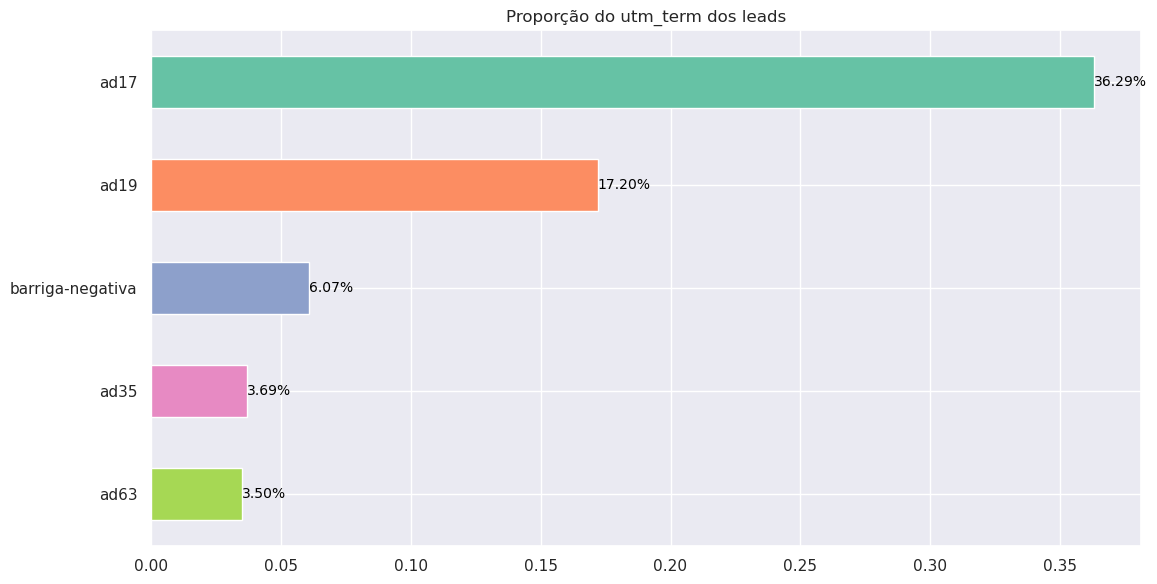

In [884]:
# Plotagem

term_counts = tabela_utm['utm_term'].value_counts(normalize=True)

colors = sns.color_palette("Set2")

# Aumenta o tamanho da figura para dar mais espaço
plt.figure(figsize=(12, 6))

term_counts.head().plot(kind="barh", color=colors)

plt.title("Proporção do utm_term dos leads")
plt.legend().set_visible(False)

# Inverte a ordem para exibir o maior valor na parte superior
plt.gca().invert_yaxis()

# Ajusta as margens para dar mais espaço à direita
plt.subplots_adjust(right=0.85)

# Adiciona os valores de proporção do lado direito das barras com ajuste
for index, value in enumerate(term_counts.head()):
    plt.text(value, index, f'{value:.2%}', va='center', color='black', ha='left', fontsize=10)

# Ajusta o layout para evitar cortes
plt.tight_layout()

# Remove o nome da coluna do eixo y
plt.gca().set_ylabel('')

plt.show()

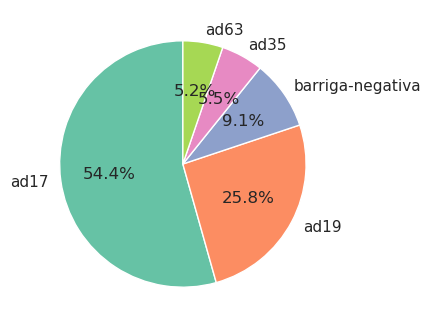

In [885]:
colors = sns.color_palette("Set2")

plt.figure(figsize=(8, 4))

# Adiciona os valores das fatias com formatação percentual
plt.pie(term_counts.head(), labels=term_counts.head().index, colors=colors, startangle=90, autopct='%1.1f%%')

plt.show()

Nesses valores, representando o anúncio que trouxe o lead, **ad17** e **ad19** lideram como maiores pontos de tráfego, embora não possua uma disparidade nas frequências.

#### Variável `utm_medium`

In [886]:
tabela_utm['utm_medium'].describe()

count                                           9996
unique                                           109
top       2.03_lookalike_1_compras_180D_ADS_Campeoes
freq                                             980
Name: utm_medium, dtype: object

In [887]:
# Contagem normalizadas
counts = tabela_utm['utm_medium'].value_counts(normalize=True)
percentages = (counts * 100).round(1).astype(str) + '%'

# DataFrame da coluna utm_medium com suas porcentagens
result_utm = pd.DataFrame({'utm_medium': counts.index, 'Porcentagem': percentages}).reset_index(drop=True)
result_utm

,utm_medium,Porcentagem
0,2.03_lookalike_1_compras_180D_ADS_Campeoes,9.8%
1,captacao,7.0%
2,2.03_lookalike_1_compras_180D,5.0%
3,2.03_lookalike_3_compras_180D,4.5%
4,2.03_lookalike_3_compras_180D_ADS_Campeoes_Adv...,3.6%
...,...,...
104,youtube,0.0%
105,1.00_Envolvimentos_30D,0.0%
106,1.06_Envolvimento_180D,0.0%
107,sem-utmmedium,0.0%


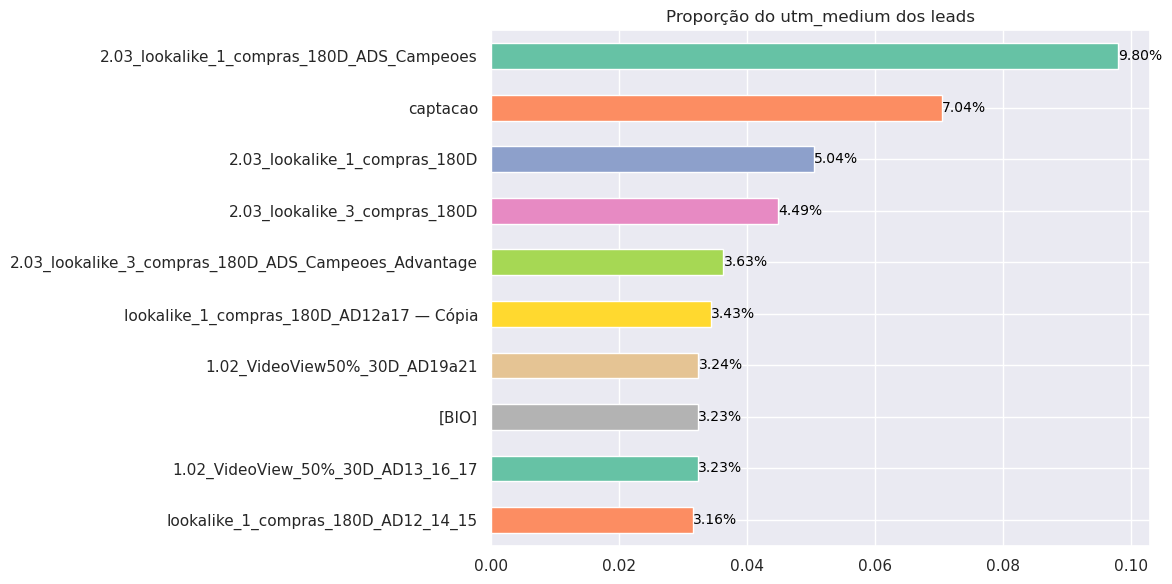

In [888]:
# Plotagem

medium_counts = tabela_utm['utm_medium'].value_counts(normalize=True)

colors = sns.color_palette("Set2")

# Aumenta o tamanho da figura para dar mais espaço
plt.figure(figsize=(12, 6))

medium_counts.head(10).plot(kind="barh", color=colors)

plt.title("Proporção do utm_medium dos leads")
plt.legend().set_visible(False)

# Inverte a ordem para exibir o maior valor na parte superior
plt.gca().invert_yaxis()

# Ajusta as margens para dar mais espaço à direita
plt.subplots_adjust(right=0.85)

# Adiciona os valores de proporção do lado direito das barras com ajuste
for index, value in enumerate(medium_counts.head(10)):
    plt.text(value, index, f'{value:.2%}', va='center', color='black', ha='left', fontsize=10)

# Ajusta o layout para evitar cortes
plt.tight_layout()

# Remove o nome da coluna do eixo y
plt.gca().set_ylabel('')

plt.show()

Nessa análise, observamos que o público nos meios de tráfegos possuem um certo equilíbro nas suas frequências, com uma leve maioria no **2.03_lookalike_1_compras_180D_ADS_Campeoes**.

### 3.1.2 Tabela  leads compradores

In [889]:
leads_count = tabela_utm['email'].count()
comp_count = tabela_vendas['email'].count()
total = comp_count/leads_count * 100
print('Dos {} leads inscritos no lançamento, {} executaram a compra, que corresponde a {:.2f}% do total de leads.'.format(leads_count,comp_count,total))

Dos 9999 leads inscritos no lançamento, 71 executaram a compra, que corresponde a 0.71% do total de leads.


### 3.1.3 Tabela de links de origem dos dados

In [890]:
links_count = tabela_links['utm_term'].count()
print('Existem {} links para alguns dos anúncios retratados como origem dos leads.'.format(links_count))

Existem 53 links para alguns dos anúncios retratados como origem dos leads.


### 3.1.4 Tabela dados pessoais

Como esses dados representam alguns dos leads e ja temos análises individuais dos seus domínios, iremos analisar as outras variáveis.

#### Variável `idade`

In [891]:
tabela_pesquisa['idade'].describe()

count             1321
unique              10
top       41 a 45 anos
freq               257
Name: idade, dtype: object

In [892]:
# Contagem normalizadas
counts = tabela_pesquisa['idade'].value_counts(normalize=True)
percentages = (counts * 100).round(1).astype(str) + '%'

# DataFrame da coluna idade com suas porcentagens
result_utm = pd.DataFrame({'idade': counts.index, 'Porcentagem': percentages}).reset_index(drop=True)
result_utm

,idade,Porcentagem
0,41 a 45 anos,19.5%
1,46 a 50 anos,17.0%
2,36 a 40 anos,16.1%
3,51 a 55 anos,12.9%
4,31 a 35 anos,12.2%
5,acima de 60,7.0%
6,56 a 60 anos,6.9%
7,26 a 30 anos,5.1%
8,21 a 25 anos,2.2%
9,até 20 anos,1.1%


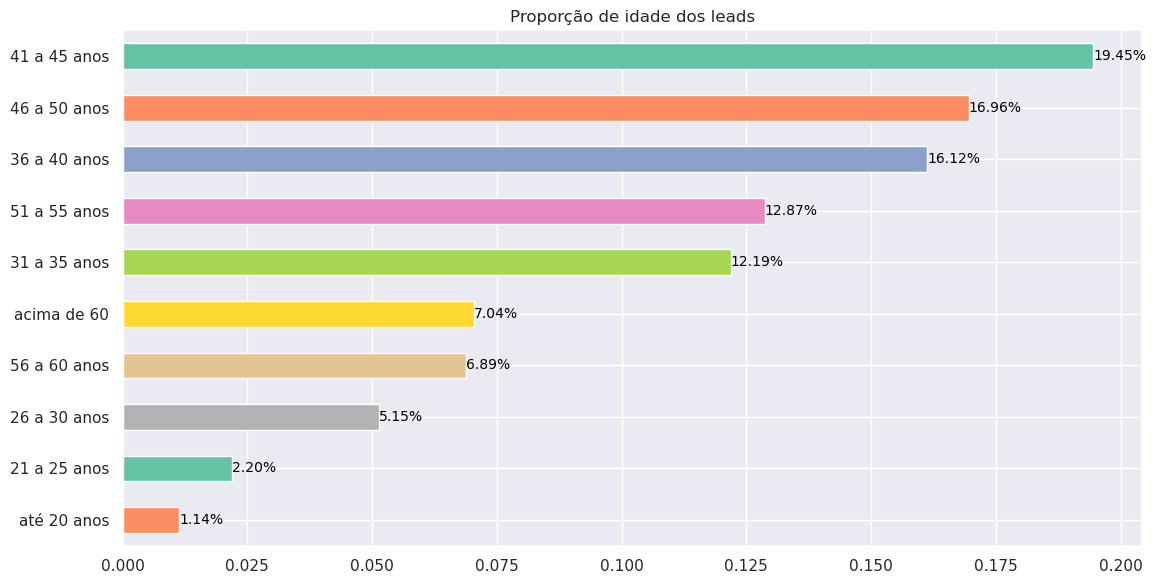

In [893]:
# Plotagem

idade_counts = tabela_pesquisa['idade'].value_counts(normalize=True)

colors = sns.color_palette("Set2")

# Aumenta o tamanho da figura para dar mais espaço
plt.figure(figsize=(12, 6))

idade_counts.plot(kind="barh", color=colors)

plt.title("Proporção de idade dos leads")
plt.legend().set_visible(False)

# Inverte a ordem para exibir o maior valor na parte superior
plt.gca().invert_yaxis()

# Ajusta as margens para dar mais espaço à direita
plt.subplots_adjust(right=0.85)

# Adiciona os valores de proporção do lado direito das barras com ajuste
for index, value in enumerate(idade_counts.head(10)):
    plt.text(value, index, f'{value:.2%}', va='center', color='black', ha='left', fontsize=10)

# Ajusta o layout para evitar cortes
plt.tight_layout()

# Remove o nome da coluna do eixo y
plt.gca().set_ylabel('')

plt.show()

Podemos observar que há um equilíbrio na porcentagem de idades dos leads, com uma leve vantagem para idades entre **31 e 55** anos. Talvez seja interessante focar em anúncios para essa faixa etária.

#### Variável `renda`

In [894]:
tabela_pesquisa['renda'].describe()

count                1321
unique                  4
top       Até 1.500 reais
freq                  703
Name: renda, dtype: object

In [895]:
# Contagem normalizadas
counts = tabela_pesquisa['renda'].value_counts(normalize=True)
percentages = (counts * 100).round(1).astype(str) + '%'

# DataFrame da coluna renda com suas porcentagens
result_utm = pd.DataFrame({'renda': counts.index, 'Porcentagem': percentages}).reset_index(drop=True)
result_utm

,renda,Porcentagem
0,Até 1.500 reais,53.2%
1,De 1.500 a 3.000 reais,26.3%
2,De 3.000 reais a 5.000 reais,12.7%
3,Mais de 5.000 reais,7.8%


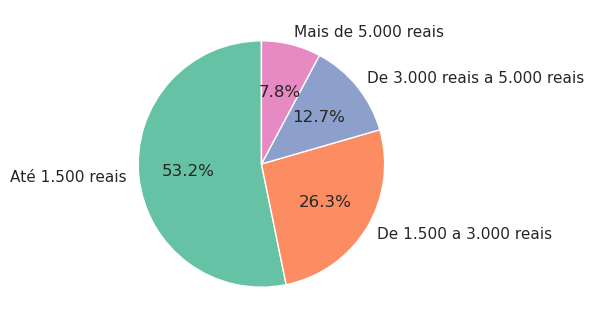

In [896]:
# Plotagem

renda_counts = tabela_pesquisa['renda'].value_counts(normalize=True)

colors = sns.color_palette("Set2")

plt.figure(figsize=(8, 4))

# Adiciona os valores das fatias com formatação percentual
plt.pie(renda_counts, labels=renda_counts.index, colors=colors, startangle=90, autopct='%1.1f%%')

plt.show()

A grande maioria dos leads possuem rendas **abaixo de 1500 reais**, com uma leve quantidade entre **1500 a 3000 reais**.

#### Variável `tempo_me_conhece`

In [897]:
tabela_pesquisa['tempo_me_conhece'].describe()

count               1321
unique                 5
top       Menos de 1 mês
freq                 806
Name: tempo_me_conhece, dtype: object

In [898]:
# Contagem normalizadas
counts = tabela_pesquisa['tempo_me_conhece'].value_counts(normalize=True)
percentages = (counts * 100).round(1).astype(str) + '%'

# DataFrame da coluna tempo_me_conhece com suas porcentagens
result_utm = pd.DataFrame({'tempo_me_conhece': counts.index, 'Porcentagem': percentages}).reset_index(drop=True)
result_utm

,tempo_me_conhece,Porcentagem
0,Menos de 1 mês,61.0%
1,Mais de 2 anos,10.6%
2,De 1 a 2 anos,9.7%
3,De 2 a 6 meses,9.6%
4,De 6 meses a 1 ano,9.1%


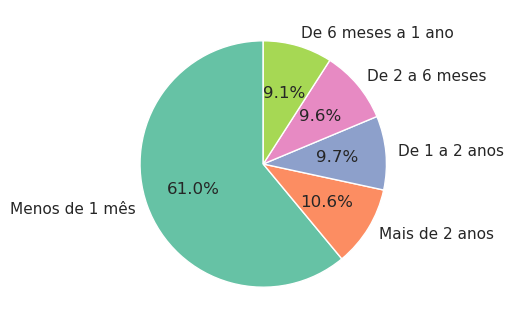

In [993]:
# Plotagem

tempo_me_conhece_counts = tabela_pesquisa['tempo_me_conhece'].value_counts(normalize=True)

colors = sns.color_palette("Set2")

plt.figure(figsize=(8, 4))

# Adiciona os valores das fatias com formatação percentual
plt.pie(tempo_me_conhece_counts, labels=tempo_me_conhece_counts.index, colors=colors, startangle=90, autopct='%1.1f%%')

plt.show()

A grande maioria dos leads conhecem há menos de 1 mês o expert, ou seja, provavelmente ficou conhecido após o lançamento.

## 3.2 Análise Multivariada

### 3.2.1 Hipóteses

#### Hipótese 1

A ordem das fontes `utm_source` dos compradores segue a mesma tendência observada nos leads. - **VERDADEIRO**

* A tabela de leads mostra uma ordem específica de frequência para cada utm_source mostrada no gŕafico. Na tabela de compradores, essa ordem se mantém, com destaque para Facebook Ads, seguido por ManyChat, Bio, Google Leads, Stories, Email, Direct, e YouTube.

* **Podemos direcionar nossos investimentos em anúncios seguindo a ordem de frequência apresentada nos gráficos, com ênfase especial no Facebook Ads, que se destaca com a maior frequência entre todas as plataformas.** 

In [904]:
emails_comum = tabela_utm[tabela_utm['email'].isin(tabela_vendas['email'])]

# Contagem normalizadas
counts1= tabela_utm['utm_source'].value_counts(normalize=True)
percentages1 = (counts1 * 100).round(1).astype(str) + '%'

# DataFrame da coluna utm_source com suas porcentagens
result_utm1 = pd.DataFrame({'utm_source': counts1.index, 'Porcentagem_leads': percentages1}).reset_index(drop=True)
result_utm1 = result_utm1.set_index('utm_source')

# Contagem normalizadas
counts2= emails_comum['utm_source'].value_counts(normalize=True)
percentages2 = (counts2 * 100).round(1).astype(str) + '%'

# DataFrame da coluna utm_source com suas porcentagens
result_utm2 = pd.DataFrame({'utm_source': counts2.index, 'Porcentagem_compradores': percentages2}).reset_index(drop=True)
result_utm2 = result_utm2.set_index('utm_source')

result_utm = result_utm1.merge(result_utm2, left_index=True, right_index=True)
result_utm

,Porcentagem_leads,Porcentagem_compradores
utm_source,,
facebookads,84.1%,56.3%
manychat,6.0%,18.3%
bio,3.2%,9.9%
googleads,2.6%,5.6%
stories,2.5%,5.6%
email,1.1%,1.4%
direct,0.1%,1.4%
youtube,0.0%,1.4%


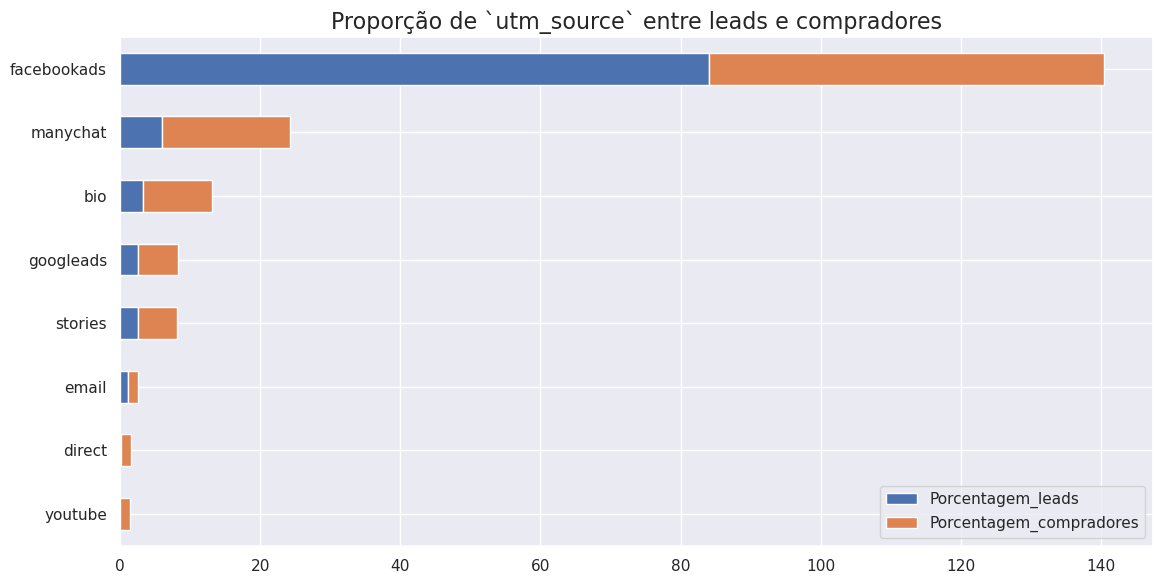

In [905]:
# Transformar em float
result_utm['Porcentagem_leads'] = result_utm['Porcentagem_leads'].str.rstrip('%').astype(float)
result_utm['Porcentagem_compradores'] = result_utm['Porcentagem_compradores'].str.rstrip('%').astype(float)

sns.set()

# Criando o gráfico de barras empilhadas
result_utm.plot(kind='barh', stacked=True, figsize=(12, 6))

# Inverte a ordem para exibir o maior valor na parte superior
plt.gca().invert_yaxis()

plt.legend(loc='lower right')
plt.title('Proporção de `utm_source` entre leads e compradores', fontsize=16)

# Ajusta o layout para evitar cortes
plt.tight_layout()

# Remove o nome da coluna do eixo y
plt.gca().set_ylabel('')

plt.show()

#### Hipótese 2

A ordem das fontes `renda` dos compradores segue a mesma tendência observada nos leads. - **Falso**

* A tabela de leads revela uma ordem específica de frequência para cada faixa de renda apresentada no gráfico. No entanto, na tabela de compradores, essa ordem não é mantida. Apenas a faixa de renda até 1.500 reais segue a mesma ordem, enquanto os clientes com rendas acima de 3.000 reais mostraram uma alta porcentagem de compras. Em contraste, a maioria dos leads tinha renda inferior a 3.000 reais.
* **Podemos direcionar nossos investimentos em anúncios para pessoas com renda maior que 3000 reais.** 
* **Podemos realizar algumas promoções para pessoas com renda menor que 3000 reais.** 

In [963]:
contagem = tabela_utm['email'].value_counts()
duplicados = contagem[contagem > 1].index
df_unicos = tabela_utm[~tabela_utm['email'].isin(duplicados)]

contagem1 = tabela_pesquisa['email'].value_counts()
duplicados1 = contagem1[contagem1 > 1].index
df_unicos1 = tabela_pesquisa[~tabela_pesquisa['email'].isin(duplicados1)]

emails_comum2 = df_unicos[df_unicos['email'].isin(df_unicos1['email'])]
emails_comum2 = emails_comum2.merge(df_unicos1, on='email',suffixes=('', '_drop'))
emails_comum2 = emails_comum2.filter(regex='^(?!.*_drop)')

In [964]:
# Contagem normalizadas
counts3= emails_comum2['renda'].value_counts(normalize=True)
percentages3 = (counts3 * 100).round(1).astype(str) + '%'

# DataFrame da coluna renda com suas porcentagens
result_utm2 = pd.DataFrame({'renda': counts3.index, 'Porcentagem_leads': percentages3}).reset_index(drop=True)
result_utm2 = result_utm2.set_index('renda')
result_utm2

,Porcentagem_leads
renda,
Até 1.500 reais,53.4%
De 1.500 a 3.000 reais,26.0%
De 3.000 reais a 5.000 reais,12.8%
Mais de 5.000 reais,7.8%


In [965]:
emails_comum3 = tabela_vendas[tabela_vendas['email'].isin(df_unicos1['email'])]
emails_comum3 = emails_comum3.merge(df_unicos1, on='email',suffixes=('', '_drop'))
emails_comum3 = emails_comum3.filter(regex='^(?!.*_drop)')

In [966]:
# Contagem normalizadas
counts4= emails_comum3['renda'].value_counts(normalize=True)
percentages4 = (counts4 * 100).round(1).astype(str) + '%'

# DataFrame da coluna renda com suas porcentagens
result_utm3 = pd.DataFrame({'renda': counts4.index, 'Porcentagem_compradores': percentages4}).reset_index(drop=True)
result_utm3 = result_utm3.set_index('renda')
result_utm3

,Porcentagem_compradores
renda,
Até 1.500 reais,38.9%
De 3.000 reais a 5.000 reais,25.0%
Mais de 5.000 reais,19.4%
De 1.500 a 3.000 reais,16.7%


In [967]:
result_utm = pd.merge(result_utm2, result_utm3, left_index=True, right_index=True)
result_utm

,Porcentagem_leads,Porcentagem_compradores
renda,,
Até 1.500 reais,53.4%,38.9%
De 1.500 a 3.000 reais,26.0%,16.7%
De 3.000 reais a 5.000 reais,12.8%,25.0%
Mais de 5.000 reais,7.8%,19.4%


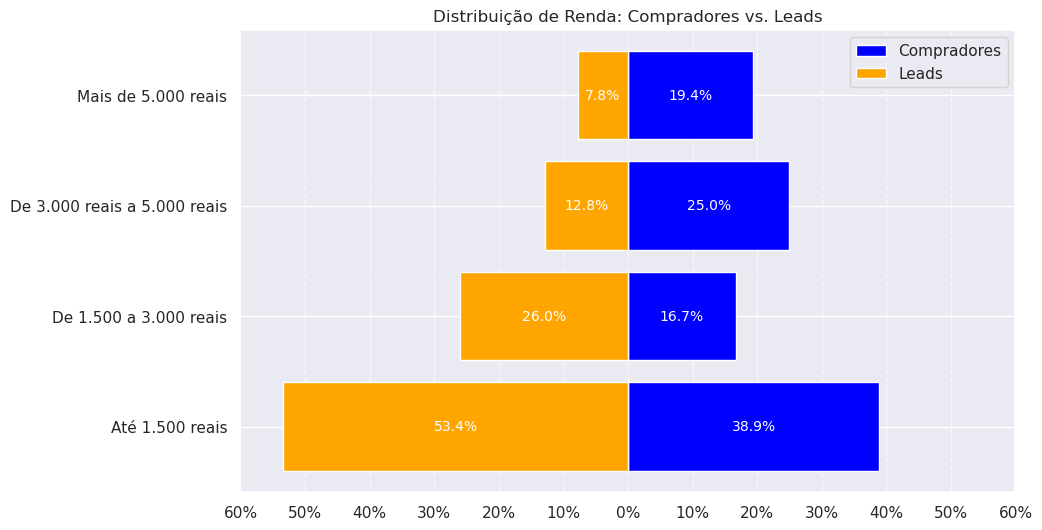

In [968]:
result_utm['Porcentagem_leads'] = result_utm['Porcentagem_leads'].str.rstrip('%').astype(float)
result_utm['Porcentagem_compradores'] = result_utm['Porcentagem_compradores'].str.rstrip('%').astype(float)

fig, ax = plt.subplots(figsize=(10, 6))

bars_compradores = ax.barh(result_utm.index, result_utm['Porcentagem_compradores'], color='blue', label='Compradores', align='center')
bars_leads = ax.barh(result_utm.index, -result_utm['Porcentagem_leads'], color='orange', label='Leads', align='center')

# Adicionar valores dentro das barras de compradores
for bar in bars_compradores:
    width = bar.get_width()
    ax.text(width * 0.5, bar.get_y() + bar.get_height() / 2, f'{width}%', va='center', ha='center', color='white', fontsize=10)

# Adicionar valores dentro das barras de leads
for bar in bars_leads:
    width = -bar.get_width()  # Convertendo de volta para valor positivo
    ax.text(-width * 0.5, bar.get_y() + bar.get_height() / 2, f'{width}%', va='center', ha='center', color='white', fontsize=10)

# Ajustar o estilo
ax.set_title('Distribuição de Renda: Compradores vs. Leads')
ax.legend(loc='best')
ax.set_xticks(range(-60, 70, 10))
ax.set_xticklabels([str(abs(x)) + '%' for x in ax.get_xticks()])

plt.grid(axis='x', linestyle='--', alpha=0.7)    
    
plt.show()